In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

We generalise our results for 3-SAT to k-SAT and in doing so, recast our problem as a minimisation.

As introduced in Section 4.1, let $\underline{\sigma} \sim CNF(n, k, r)$ a problem instance such that 

$$\underline{\sigma} := \bigwedge\limits_{i = 1}^m \sigma_i$$

where

$$ \sigma_i = \bigvee_{j = 1}^{k} l_{\sigma_{ij}} $$

$ l_{\sigma_{ij}}$ is a boolean literal such that $ l_{\sigma_{ij}} = x_{\sigma_{ij}}$ or $\neg x_{\sigma_{ij}}$ and $\sigma_{ij} \in \{1, \dots, n\}$ is an index into the $n$ variables.

We seek the representing Hamiltonian $\hat{\mathcal{H}}_{\underline{\sigma}}$. This is recognised as a Pseudo-Boolean function, meaning that

$$\hat{\mathcal{H}}_{\underline{\sigma}} = \sum_{i = 1}^m \hat{\mathcal{H}}_{\sigma_i}$$

We identify (De Morgan's)

$$\sigma_i = \bigvee_{j = 1}^{k} l_{\sigma_{ij}} \equiv \neg \left( \bigwedge_{j = 1}^{k} \neg l_{\sigma_{ij}} \right)$$

$$\Rightarrow \hat{\mathcal{H}}_{\sigma_i} \equiv \hat{\mathcal{H}}_{\neg \left( \bigwedge_{j = 1}^{k} \neg l_{\sigma_{ij}} \right)} = \mathbb{I} - \hat{\mathcal{H}}_{\left( \bigwedge_{j = 1}^{k} \neg l_{\sigma_{ij}} \right)} = \mathbb{I} - \prod_{j = 1}^{k}\hat{\mathcal{H}}_{\neg l_{\sigma_{ij}}} = \mathbb{I} - \prod_{j = 1}^{k}(\mathbb{I} - \hat{\mathcal{H}}_{l_{\sigma_{ij}}})$$

Recall

$$ \hat{\mathcal{H}}_{l_{\sigma_{ij}}} = \frac{1}{2}\mathbb{I} + s_{\sigma_{ij}}\frac{1}{2}Z_{\sigma_{ij}} $$

represents $l_{\sigma_{ij}}$, where $l_{\sigma_{ij}} = x_{\sigma_{ij}} \Rightarrow s_{\sigma_{ij}} = -1$ and $l_{\sigma_{ij}} = \neg x_{\sigma_{ij}} \Rightarrow s_{\sigma_{ij}} = 1$ 

$$\Rightarrow \hat{\mathcal{H}}_{\sigma_i} = \mathbb{I} - \prod_{j = 1}^{k}(\mathbb{I} - \hat{\mathcal{H}}_{l_{\sigma_{ij}}}) = \mathbb{I} - \prod_{j = 1}^{k}(\mathbb{I} - \frac{1}{2}\mathbb{I} - s_{\sigma_{ij}}\frac{1}{2}Z_{\sigma_{ij}}) = \mathbb{I} - \frac{1}{2^k}\prod_{j = 1}^{k}\left( \mathbb{I} - s_{\sigma_{ij}}Z_{\sigma_{ij}} \right)$$

Reformulating as a minimisation problem and ignoring constansts

$$ \rightarrow \hat{\mathcal{H}}_{\sigma_i} = \frac{1}{2^k}\prod_{j = 1}^{k}\left( \mathbb{I} - s_{\sigma_{ij}}Z_{\sigma_{ij}} \right)$$

We expand this (again ignoring constant terms) to arrive at 

$$ \hat{\mathcal{H}}_{\sigma_i} = \frac{1}{2^k}\left(-\sum_{a = 1}^{k} s_{\sigma_{ia}}Z_{\sigma_{ia}} + \sum_{b > a}^{k} s_{\sigma_{ia}}s_{\sigma_{ib}}Z_{\sigma_{ia}}Z_{\sigma_{ib}} - \sum_{c > b > a}^{k} s_{\sigma_{ia}}s_{\sigma_{ib}}s_{\sigma_{ic}}Z_{\sigma_{ia}}Z_{\sigma_{ib}}Z_{\sigma_{ic}} \dots \right) $$

Next, we consider the corresponding unitary operator

\begin{equation}
\begin{split}
	\hat{\mathcal{U}}_{\underline{\sigma}}(\gamma) &= \exp\left[-i \gamma \hat{\mathcal{H}}_{\underline{\sigma}}\right] \\
	&= \exp \left[-i \gamma \sum_{i = 1}^m \hat{\mathcal{H}}_{\sigma_i}\right] \\
	&= \prod_{i = 1}^m \exp \left[-i \gamma \hat{\mathcal{H}}_{\sigma_i}\right] \\
	&:= \prod_{i = 1}^m \hat{\mathcal{U}}_{\sigma_i}(\gamma)
\end{split}
\end{equation}

\begin{equation}
\begin{split}
	\hat{\mathcal{U}}_{\sigma_i}(\gamma) &= \exp \left[-i \gamma \frac{1}{2^k}\left(-\sum_{a = 1}^{k} s_{\sigma_{ia}}Z_{\sigma_{ia}} + \sum_{b > a}^{k} s_{\sigma_{ia}}s_{\sigma_{ib}}Z_{\sigma_{ia}}Z_{\sigma_{ib}} - \sum_{c > b > a}^{k} s_{\sigma_{ia}}s_{\sigma_{ib}}s_{\sigma_{ic}}Z_{\sigma_{ia}}Z_{\sigma_{ib}}Z_{\sigma_{ic}} \dots \right) \right] \\
	&= \exp \left[i \gamma \frac{1}{2^k}\sum_{a = 1}^{k} s_{\sigma_{ia}}Z_{\sigma_{ia}} \right] \exp \left[-i \gamma \frac{1}{2^k} \sum_{b > a}^{k} s_{\sigma_{ia}}s_{\sigma_{ib}}Z_{\sigma_{ia}}Z_{\sigma_{ib}} \right] \exp \left[i \gamma \frac{1}{2^k} \sum_{c > b > a}^{k} s_{\sigma_{ia}}s_{\sigma_{ib}}s_{\sigma_{ic}}Z_{\sigma_{ia}}Z_{\sigma_{ib}}Z_{\sigma_{ic}} \right] \dots \\
	&= \prod_{a = 1}^{k} \exp \left[i \gamma \frac{1}{2^k} s_{\sigma_{ia}}Z_{\sigma_{ia}} \right] \prod_{b > a}^{k}\exp \left[-i \gamma \frac{1}{2^k}  s_{\sigma_{ia}}s_{\sigma_{ib}}Z_{\sigma_{ia}}Z_{\sigma_{ib}} \right] \prod_{c > b > a}^{k}\exp \left[i \gamma \frac{1}{2^k}  s_{\sigma_{ia}}s_{\sigma_{ib}}s_{\sigma_{ic}}Z_{\sigma_{ia}}Z_{\sigma_{ib}}Z_{\sigma_{ic}} \right] \dots \\
	&= \prod_{a = 1}^{k} R_{Z_{\sigma_{ia}}}\left[-\frac{\gamma}{2^{k-1}} s_{\sigma_{ia}} \right] \prod_{b > a}^{k}R_{Z_{\sigma_{ia}}Z_{\sigma_{ib}}} \left[\frac{\gamma}{2^{k-1}}  s_{\sigma_{ia}}s_{\sigma_{ib}} \right] \prod_{c > b > a}^{k}R_{Z_{\sigma_{ia}}Z_{\sigma_{ib}}Z_{\sigma_{ic}}} \left[-\frac{\gamma}{2^{k-1}}  s_{\sigma_{ia}}s_{\sigma_{ib}}s_{\sigma_{ic}} \right] \dots \\

\end{split}
\end{equation}

Qiskit provides a `UnitaryGate` class that creates a gate from a matrix. However, as seen below, it appears the decomposition is not the most efficient. 

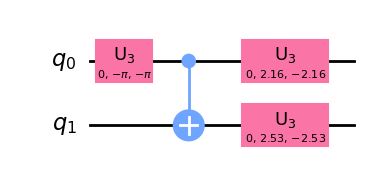

In [2]:
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate

# Implement CNOT from matrix
matrix = [[1, 0, 0, 0],
          [0, 0, 0, 1],
          [0, 0, 1, 0],
          [0, 1, 0, 0]]
gate = UnitaryGate(matrix)

circuit = QuantumCircuit(2)
circuit.append(gate, [0, 1])
circuit.decompose().draw("mpl")

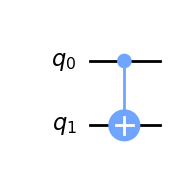

In [3]:
# Compare to actual CNOT
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

**Theorem** 

$$ \exp \left[-i \gamma \prod_{i = 1}^{k} Z_i \right] = \exp \left[-i \gamma Z^{\otimes k} \right] = \left(\prod_{i = 1}^{k - 1}\text{CX}_{k - i, k - i + 1}\right)R_{Z_{k}}(2\gamma)\left(\prod_{i = 1}^{k - 1}\text{CX}_{i, i+1}\right) $$

where $CX_{a,b}$ is the controlled-not gate with control qubit $a$ and target qubit $b$.

**Proof**

Base case: $k = 2$

$$
\text{CX}_{1, 2}R_{Z_2}(2\gamma)\text{CX}_{1, 2} = 
\left(\begin{matrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{matrix}\right)
\left(\begin{matrix}
e^{-i \gamma}& 0 & 0 & 0\\
0 & e^{i \gamma} & 0 & 0\\
0 & 0 & e^{-i \gamma} & 0\\
0 & 0 & 0 & e^{i \gamma}\\
\end{matrix}\right)
\left(\begin{matrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{matrix}\right)
= 
\left(\begin{matrix}
e^{-i \gamma}& 0 & 0 & 0\\
0 & e^{i \gamma} & 0 & 0\\
0 & 0 & e^{i \gamma} & 0\\
0 & 0 & 0 & e^{-i \gamma}\\
\end{matrix}\right)
= 
\exp \left[-i \gamma \left(\begin{matrix}
1 & 0 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & 1\\
\end{matrix}\right)\right]
= \exp \left[-i \gamma Z_1Z_2\right]
$$

Inductive case:

Assumption: $$ \exp \left[-i \gamma \prod_{i = 1}^{n} Z_i \right] = \left(\prod_{i = 1}^{n - 1}\text{CX}_{n - i - 1, n - i}\right)R_{Z_{n}}(2\gamma)\left(\prod_{i = 1}^{n - 1}\text{CX}_{i, i+1}\right) $$

Consider $k = n + 1$

$$ \exp \left[-i \gamma \prod_{i = 2}^{n+1} Z_i \right] = \exp \left[-i \gamma Z^{\otimes (n + 1)}\right] =  \exp \left[-i \gamma Z \otimes Z^{\otimes n} \right] = \sum_k \frac{}{} $$ 

We demonstrate solving a $k$-SAT problem using `QAOA` vs `WalkSATlm`

We first set up a trivial problem that has assignment solution $x = 111$

In [4]:
from formula.cnf import CNF
from formula.clause import Clause
from formula.variable import Variable

In [5]:
x0 = Variable(0, False) 
x1 = Variable(1, False) 
x2 = Variable(2, False) 
notx0 = Variable(0, True) 
notx1 = Variable(1, True) 
notx2 = Variable(2, True) 

c1 = Clause([x0, x1, x2])
c2 = Clause([x0, x1, notx2])
c3 = Clause([x0, notx1, x2])
c4 = Clause([x0, notx1, notx2])
c5 = Clause([notx0, x1, x2])
c6 = Clause([notx0, x1, notx2])
c7 = Clause([notx0, notx1, x2])

cnf = CNF([c1, c2, c3, c4, c5, c6, c7])

Use `QAOA` to solve

In [6]:
from k_sat.quantum_solver.quantum_solver import QuantumSolver
qs = QuantumSolver()

In [7]:
qs.sat(cnf)

Encoding training formulas into quantum circuits
Finding optimal parameters for training circuits
Finding/evaluating satisfying assignment


('-1', 1)

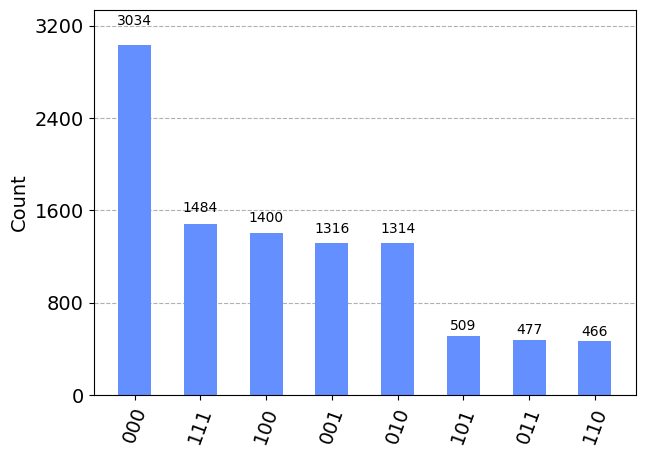

In [8]:
qs.visualise_result(cnf)

Now we solve the instance using `WalkSATlm` and compare the run time

In [9]:
from k_sat.walkSATlm.walkSATlm import WalkSATlm

wslm = WalkSATlm()

In [10]:
wslm.sat(cnf)

('111', 2)